In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import stft
from scipy.io.wavfile import read as wave_read
from scipy.fft import fft, ifft, fftshift, fft2, ifft2

#%matplotlib inline 

In [9]:
def step(x):
    if x >= -.5 and x <=.5:
        return 1.
    else:
        return 0.

In [10]:
def step_fun_filter(a, b, t, w0, w):
    if t+b/2. < -a/2. or t-b/2. > a/2.:
        return 0.
    else:
        ffun = lambda tau : ( np.exp(1j*(w0-w)*tau)/(w0-w) - np.exp(-1j*(w0+w)*tau)/(w0+w) )/(2.*a*1j)
        return ffun( np.min( np.array([a/2, t + b/2.]) ) ) - ffun( np.max( np.array([-a/2, t - b/2.]) ) )


**Problem 1** (Grad/Extra Credit): Provide a more formal proof of the result we showed in class:

> Theorem: Suppose $f(t)$ is a $T$ periodic function and $f\in C^{k}([0,T])$, where $k\in \mathbb{N}$.  Show that there exists a constant $M_{k}>0$ such that 
$$
\left|\hat{f}_{n}\right|\leq M_{k}\sqrt{T}\left(\frac{T}{2\pi|n|}\right)^{k}.  
$$

**Solution:**

$$
\hat{f}_n = \langle f, e_n \rangle = \frac{1}{\sqrt{T}} \int_0^T f(t) e^{- \tfrac{2 \pi i n}{T} t} \, dt,
$$
let $\omega = \tfrac{2 \pi n}{T}$.

By IBP,

$$
\hat {f}_n
= \frac{1}{\sqrt{T}} \int_{0}^{T} f(t)\,e^{-i\omega t}\,dt
= \frac{1}{\sqrt{T}}\left[\frac{f(t)\,e^{-i\omega t}}{-i\omega}\right]_{0}^{T}+ \frac{1}{i\omega\,\sqrt{T}} \int_{0}^{T} f'(t)\,e^{-i\omega t}\,dt
$$



Since $f$ is $T$-periodic
$$
\frac{1}{\sqrt{T}}\left[\frac{f(t)\,e^{-i\omega t}}{-i\omega}\right]_{0}^{T} = 0
$$

Making
$$
\hat{f}_n = \frac{1}{i \omega \sqrt{T}} \int_0^T f'(t) e^{- i \omega t} \, dt.
$$

Repeating this $k$ times, we get
$$
\hat{f}_n = \left( \frac{1}{i \omega} \right)^k \frac{1}{\sqrt{T}} \int_0^T f^{(k)}(t) e^{- i \omega t} \, dt
$$
Replacing $\omega = \tfrac{2 \pi n}{T}$.
$$
\hat{f}_n = \left( \frac{T}{2 \pi i n} \right)^k \frac{1}{\sqrt{T}} \int_0^T f^{(k)}(t) e^{- \tfrac{2 \pi i n}{T} t} \, dt 
$$

Taking absolute values, noting $|e^{- i \theta}| = 1$, we get
$$
|\hat{f}_n| = \left( \frac{T}{2 \pi |n|} \right)^k \frac{1}{\sqrt{T}} \int_0^T \big| f^{(k)}(t) \big| \, dt,
$$

Choose
$$
M_k = \frac{1}{T} \int_0^T \big| f^{(k)}(t) \big| \, dt.
$$

Then
$$
|\hat{f}_n| \leq \left( \frac{T}{2 \pi |n|} \right)^k \sqrt{T} \, M_k. \square
$$



**Problem 2**: Find the Fourier transform of 
$$
f(t) = \left\{\begin{array}{rl} 
t & 0 \leq t \leq \pi \\ 
2\pi - t & \pi \leq t < 2 \pi
\end{array}\right.
$$

Comment on the behavior of its Fourier coefficients $\hat{f}_{n}$ as $|n|\rightarrow \infty$.  How can you explain this behavior in light of the results from Problem 1?  

**Solution**
$$
\hat f_n=\frac{1}{\sqrt{2\pi}}\int_{0}^{2\pi} f(t)e^{-int}\,dt,
\qquad
f(t)=\begin{cases}
t,&0\le t\le \pi,\\
2\pi-t,&\pi\le t\le 2\pi
\end{cases}
$$


$$
\hat f_n=\frac{1}{\sqrt{2\pi}}\left(\int_{0}^{\pi} t\,e^{-int}\,dt
+\int_{\pi}^{2\pi} (2\pi-t)\,e^{-int}\,dt\right)
= \frac{1}{\sqrt{2\pi}}(I_1+I_2)
$$

**$I_{1}$**:
$$
I_{1} =\int_{0}^{\pi} t e^{-int}\,dt
=\left[\frac{-t e^{-int}}{in}+\frac{e^{-int}}{n^2}\right]_{0}^{\pi}
= -\frac{\pi e^{-in\pi}}{in}+\frac{e^{-in\pi}-1}{n^2}.
$$

**$I_{2}$**:

$$
\int_{\pi}^{2\pi}(2\pi-t)e^{-int}\,dt
$$

$$
= 2\pi\int_{\pi}^{2\pi}e^{-int}\,dt \;-\; \int_{\pi}^{2\pi} t\,e^{-int}\,dt
$$
$$
= 2\pi\left[\frac{e^{-int}}{-in}\right]_{\pi}^{2\pi}
\;-\; \left[\frac{-t\,e^{-int}}{in}+\frac{e^{-int}}{n^2}\right]_{\pi}^{2\pi}
$$
$$
= 2\pi\cdot\frac{1-e^{-in\pi}}{-in}
$$
$$
\;-\; \left(-\frac{2\pi}{in}+\frac{1}{n^2}+\frac{\pi e^{-in\pi}}{in}-\frac{e^{-in\pi}}{n^2}\right)
$$
$$
= \frac{\pi e^{-in\pi}}{in}+\frac{e^{-in\pi}-1}{n^2}.
$$


$$
I_{1}+I_{2}
=\left(-\frac{\pi e^{-in\pi}}{in}+\frac{e^{-in\pi}-1}{n^2}\right)
+\left(\frac{\pi e^{-in\pi}}{in}+\frac{e^{-in\pi}-1}{n^2}\right)
=\frac{2\,(e^{-in\pi}-1)}{n^2}.
$$

Therefore
$$
{\;\hat f_n=\frac{1}{\sqrt{2\pi}}\cdot \frac{2\,(e^{-in\pi}-1)}{n^2},\quad n\ne0.\;}
$$
Since $e^{-in\pi}=(-1)^n$,
$$
\hat f_n=
\begin{cases}
0,& n\ \text{even},\\[2mm]
-\dfrac{4}{\sqrt{2\pi}\,n^2},& n\ \text{odd}.
\end{cases}
$$

**Comments**


For 
$$
f(t)=
\begin{cases}
t,&0\le t\le\pi,\\
2\pi-t,&\pi\le t<2\pi,
\end{cases}
$$
we have
$|\hat f_n|=O(\frac{1}{n^{2}})$

This matches the decay principle from Problem 1, where we showed
$$
|\hat{f}_n|\ \le\ \left( \frac{T}{2 \pi |n|} \right)^{k} \sqrt{T}\, M_k.\
$$




**Problem 3**: For $f(t+T)=f(t)$ so that 

$$
f(t) = \sum_{n=-\infty}^{\infty} \hat{f}_{n} e^{2\pi i n t/T}, ~ \hat{f}_{n} = \frac{1}{T} \int_{-T/2}^{T/2}f(t)e^{-2\pi i nt/T} dt,
$$

defining $\omega_{n} = 2\pi n/T$ so that $\delta \omega = 2\pi /T$, show that by letting $T\rightarrow \infty$, we have 

$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{i\omega t} \left(\int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt\right) d\omega
$$

**Solution**
$$
f(t)=\sum_{n\in\mathbb{Z}}\hat f_n\,e^{i\omega_n t},\ \ \omega_n=\tfrac{2\pi n}{T}.
$$

$$
\hat f_n=\frac{1}{T}\int_{-T/2}^{T/2} f(\tau)\,e^{-i\omega_n \tau}\,d\tau.
$$

$$
f(t)=\sum_{n\in\mathbb{Z}} e^{i\omega_n t}\,\frac{1}{T}\int_{-T/2}^{T/2} f(\tau)\,e^{-i\omega_n \tau}\,d\tau.
$$

$$
\delta\omega=\tfrac{2\pi}{T}\ \rightarrow \tfrac{1}{T}=\tfrac{\delta\omega}{2\pi}
$$

$$
f(t)=\frac{1}{2\pi}\sum_{n\in\mathbb{Z}}\Big[\int_{-T/2}^{T/2} f(\tau)\,e^{-i\omega_n \tau}\,d\tau\Big]\,e^{i\omega_n t}\,\delta\omega.
$$

$$
F_T(\omega)=\int_{-T/2}^{T/2} f(\tau)\,e^{-i\omega \tau}\,d\tau.
$$

$$
f(t)=\frac{1}{2\pi}\sum_{n\in\mathbb{Z}} F_T(\omega_n)\,e^{i\omega_n t}\,\delta\omega.
$$

$$
\text{Let }T\to\infty:\quad
F_T(\omega)\to F(\omega)=\int_{-\infty}^{\infty} f(\tau)\,e^{-i\omega \tau}\,d\tau,\quad
\sum_{n}\big(F_T(\omega_n)\,e^{i\omega_n t}\big)\,\delta\omega \ \to\ \int_{-\infty}^{\infty}\big(F(\omega)\,e^{i\omega t}\big)\,d\omega.
$$


$$
\,f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)\,e^{i\omega t}\,d\omega
=\frac{1}{2\pi}\int_{-\infty}^{\infty} e^{i\omega t}\Big(\int_{-\infty}^{\infty} f(\tau)\,e^{-i\omega \tau}\,d\tau\Big)\,d\omega\, \square
$$



**Problem 4**: Suppose you are given the signal 

$$
d(t) = \cos(\omega_{0}t)I_{a}(t)
$$

using $g_{W}(s) = I(s/b), ~b > 0$, its short time Fourier transform is:

$$
\mathcal{G}(t,\omega)\{d(t)\} = \frac{1}{a}\int_{-a/2}^{a/2}\cos(\omega_{0}\tau)I\left(\frac{\tau - t}{b}\right)e^{-i\omega \tau}.
$$

* For $\omega_{0}=10$, $a=.5$ and $b=.5$, plot $\left|\mathcal{G}(t,\omega)\{d\}\right|$ in the $(t,\omega)$ plane.
* For $\omega_{0}=10$, $a=.5$ and $b=2$, plot $\left|\mathcal{G}(t,\omega)\{d\}\right|$ in the $(t,\omega)$ plane.
* Explain the differences between the two plots.  

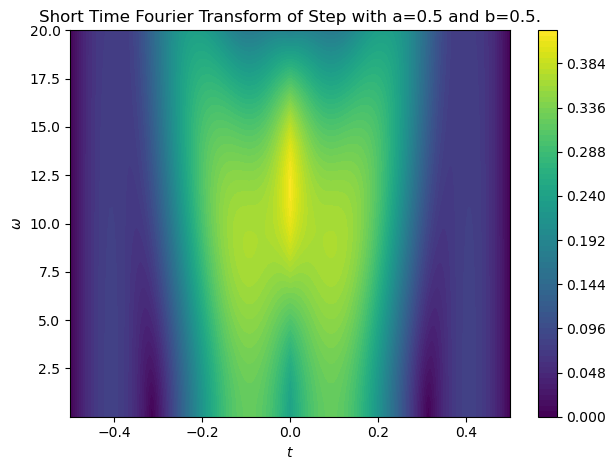

In [16]:
a = .5
b = .5
w0 = 10.
Npts = int(2e2)
tmin, tmax = -(a/2 + b/2), (a/2 + b/2) 
tvals = np.linspace(tmin, tmax, Npts+1)
#tvals = np.linspace(-1, 1, Npts+1)
ovals = np.linspace(1e-3, 20., Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()
plt.tight_layout()
plt.show()


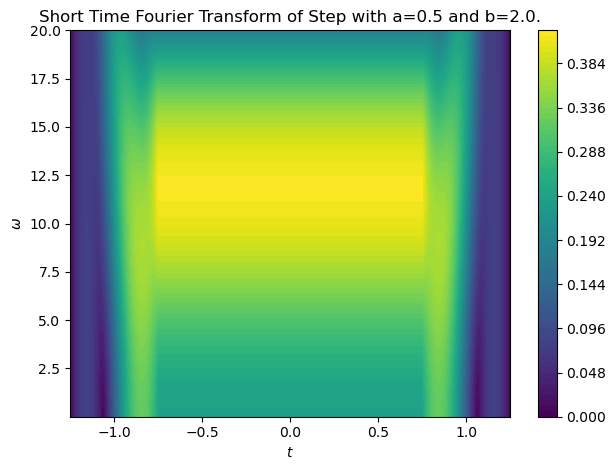

In [17]:
a = .5
b = 2.
w0 = 10.
Npts = int(2e2)
tmin, tmax = -(a/2 + b/2), (a/2 + b/2)   # = (-0.5, 0.5)
tvals = np.linspace(tmin, tmax, Npts+1)
#tvals = np.linspace(-2, 2, Npts+1)
ovals = np.linspace(1e-3, 20., Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()
plt.tight_layout()
plt.show()

So as we see, and expect, by narrowing the filter width, we see a bright spot around $\omega_{0}=10$, though smeared due to poor frequency resolution.  By increasing $b$, we of course lose time resolution, but we now see a much clearer bright band across the line $\omega_{0}=10$.  


#### a=0.5, b=0.5
- The window is the same size as the signal.  
- You only see the signal for $|t| \le 0.5$
- The brightness is strongest in the middle (biggest overlap) and fades toward the edges (overlap shrinks).  
- A bright band sits around $\omega \approx \omega_0 = 10$
- It is a bit blurry because its a short amount of time.

#### a=0.5, b=2.0
- The window is now much wider than the signal.  
- The nonzero region in time is wider: $|t|\le 1.25$.  
- In the middle, the window fully covers the signal so we see a flat bright plateau in time  
- The bright band near $\omega \approx 10$ in the center is about as blurry as before
- Once the window is bigger than the signal, the signal’s own length $a$ is the limit.


#### Differences
- Changing $b$ mainly stretches in time and creates a flat plateau when $b \ge a$.  
- The frequency location stays at $\omega \approx \omega_0$  
- How thin the vertical band can be in the center is limited by the signal length $a$

**Problem 5** (Graduate/Extra Credit): Suppose you are given the signal 

$$
d(t) = \cos(\omega_{0}t)I_{a}(t) + \cos(2\omega_{0}t)I_{a}(t-2)
$$

* Plot $d(t)$ and comment on its behavior.  
* Using $g_{W}(s) = I(s/b), b > 0$ repeat your analysis above for $\omega_{0}=10$, $a=.5$ and $b=.5$.  Explain your results. 

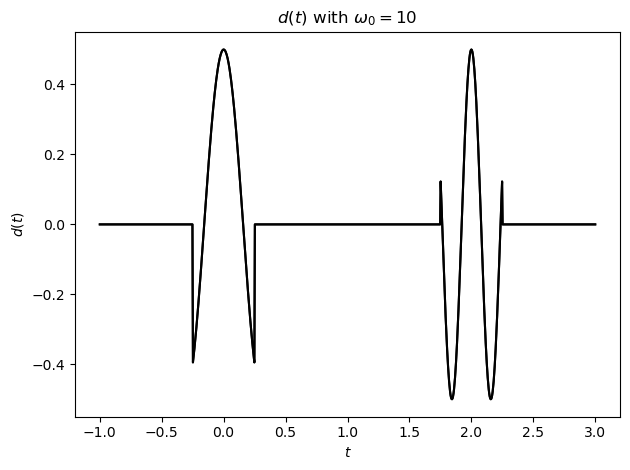

In [19]:
tvals = np.linspace(-1., 3., int(1e3)+1)
a = .5
w0 = 10.
dvals = np.cos(w0*tvals) * np.array([a*step(tval/a) for tval in tvals]) + np.cos(2.*w0*(tvals-2)) * np.array([a*step((tval-2.)/a) for tval in tvals])

plt.plot(tvals, dvals, color='k')
plt.ylabel(r"$d(t)$")
plt.xlabel(r"$t$")
plt.title(r"$d(t)$ with $\omega_{0}=10$")
plt.tight_layout()
plt.show()

**Comment on its behavior**
- here we have two signals happening
- first signal is active only when $I_a(t)=1$ which is centered around $t=0$
- the second signal is active only when $I_a(t-2)=1$ which is centered at $t=2$
- outside those short time windows the indicator is 0 so $d(t)=0$
- inside each window we see a cosine wave
- The second one seems to oscillates faster than the first one but roughly over the same time period so it has a larger frequency
- the vertical jumps at the window boundaries $\pm0.25,\ 1.75,\ 2.25$  come from the box indicator turning the tone on and off instantly.



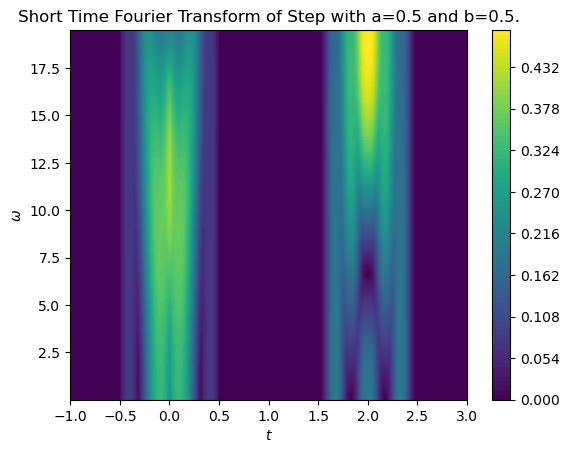

In [16]:
a = .5
b = .5
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-1, 3, Npts+1)
ovals = np.linspace(1e-3, 19.5, Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]) + step_fun_filter(a, b, tvals[jj]-2., 2.*w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()
plt.tight_layout()
plt.show()

So as we expect, we get two time separated signals each with some degree of frequency localization around their carrier frequencies.  The low value of $b$ though causes significant smearing in frequency space, though we already knew that would be an issue from above.  Just to see what happens if we play with this a little, let's repeat the above but with $b=1.$

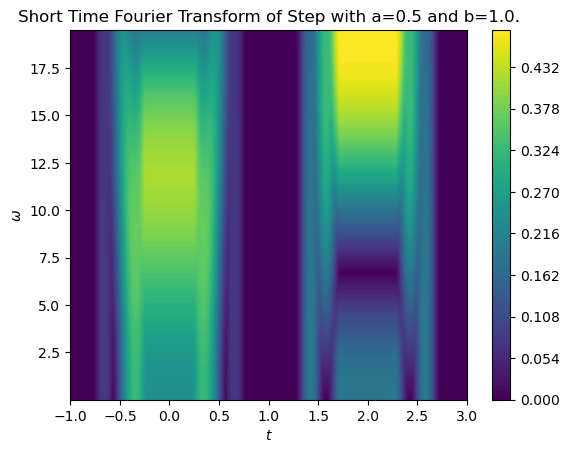

In [17]:
a = .5
b = 1.
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-1, 3, Npts+1)
ovals = np.linspace(1e-3, 19.5, Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]) + step_fun_filter(a, b, tvals[jj]-2., 2.*w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()
plt.tight_layout()
plt.show()

**Explain the results**
#### b=0.5
- The first signal shows a bright ridge $\omega\approx 10$ around $t=0$
- The second signal shows a bright ridge $\omega\approx 20$ around $t=2$.
- Each is brightest in the middle where the window overlaps the signal the most and fades toward the edges.  


#### b=1.0
- Each signals’s nonzero region in time becomes wider
- the window still catches the signsal even when it’s not perfectly centered
- Around each signals’s center we see a flat, bright plateau because the window fully contains the whole signal
- The band near $\omega\approx 10$ and near $\omega\approx 20$ is about as blurry in the center as before
- the signal’s own short duration $\alpha=0.5$ limits how sharp the frequency can look

**Differences:**  
With two short tones, the STFT shows two time-localized frequency bands with one at $\omega\approx\omega_0$ near $t=0$, and one at $\omega\approx 2\omega_0$ near $t=2$. Increasing $b$ mainly stretches how long each band remains visible in time and creates a plateau for each signal, but it does not make the center of each band sharper in frequency which is capped by the signal length $\alpha$.


**Problem 6**: Generate a short-time Fourier transform decomposition of Cantina60.wav.  Explain your parameter choices, and show possible alternative representations of your STFT and why you finally chose the one that you did.  You should also make recourse to the song itself and use that to help you explain your decision making process.

In [20]:
rate, star_wars_data = wave_read('CantinaBand60.wav') # This is the first minute of the 
print(type(star_wars_data))

nsamp = star_wars_data.size
star_wars_fs = nsamp/60. # number of samples taken over 60s is sampling frequency
tvals = np.linspace(0., 60., nsamp)
freqvals = np.arange(int(nsamp/2))/60.
print(f"File is sampled at {star_wars_fs} cycles/second")
freq_star = np.abs(fft(star_wars_data))

<class 'numpy.ndarray'>
File is sampled at 22050.0 cycles/second


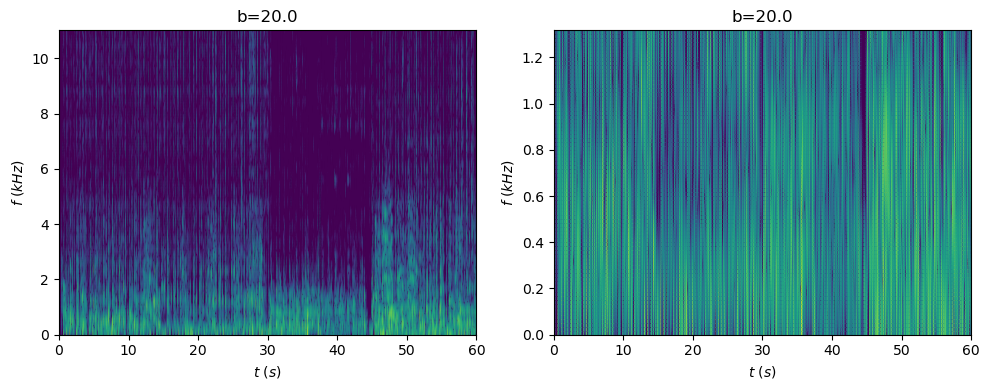

In [26]:
#bval2 = 10.
bval2 = 20.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()
plt.show()

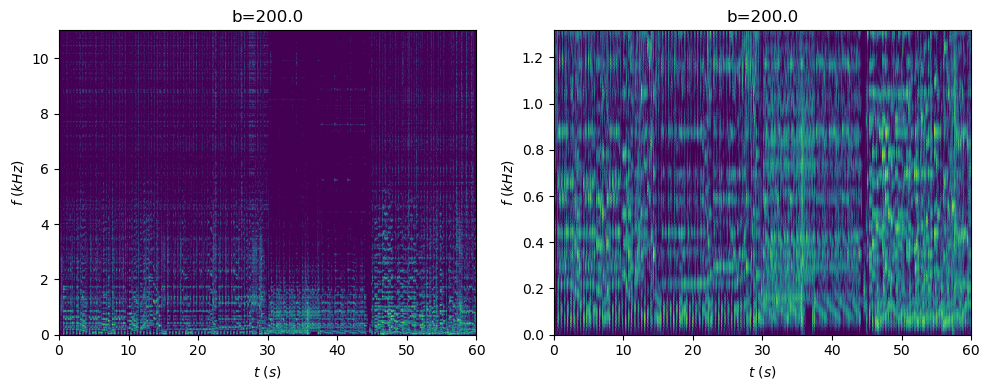

In [27]:
#bval2 = 100.
bval2 = 200.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()
plt.show()


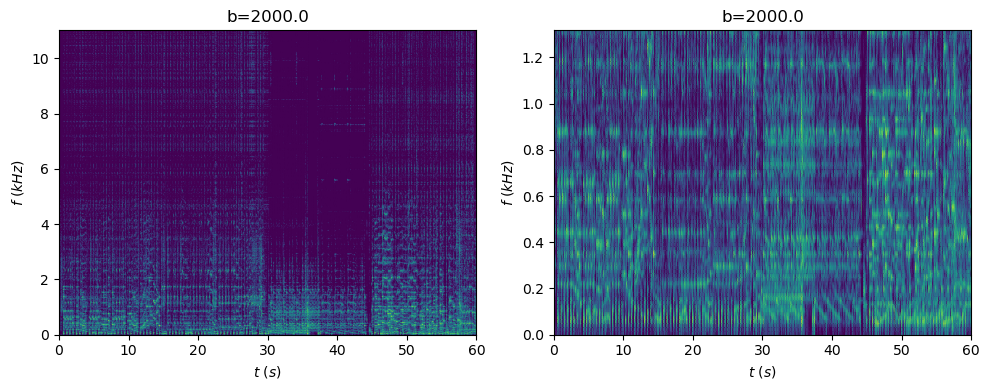

In [28]:
#bval2 = 1000.
bval2 = 2000.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()
plt.show()


#### b = 20 
- very clear vertical texture across the song the zoomed low band shows thick frequency bands.
- This captures changes in time really well, but each note’s frequency content is blurred because the listening interval is short 
#### b = 200 
- the stacks above each note start to look clean and separated but we can still spot sections 
- longer listening gives better definition
#### b = 2000
- very thin horizontal lines in the low band
-the window now averages over a long span, so frequencies are sharp but still see smearing

### Compare to problems 4 and 5
- b = 200 is the best balance since we can see the song and still notice structure  
- In P4/P5 we had one or two short tones in short time windows so we saw isolated bands in time–frequency.
- Here we have a full song with many overlapping notes happening at once.
- The same window logic applies, but now there are many bands at once

